<a href="https://colab.research.google.com/github/artpods56/lego_pathing_robot/blob/main/examples/vision/ipynb/mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image



## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 8ms/step - loss: 0.3690 - accuracy: 0.8858 - val_loss: 0.0836 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1129 - accuracy: 0.9651 - val_loss: 0.0551 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0861 - accuracy: 0.9732 - val_loss: 0.0468 - val_accuracy: 0.9880
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.0397 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0610 - accuracy: 0.9806 - val_loss: 0.0395 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0349 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0533 - accuracy: 0.9831 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch

## Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025521131232380867
Test accuracy: 0.9915000200271606


In [38]:
log = [[29, -3.0], [29, -3.0], [30, -3.0], [30, -3.5], [29, 7.5], [30, -4.0], [30, -1.0], [30, -1.0], [30, -1.0], [31, 3.5], [29, 4.0], [1, -90], [30, -5.0], [31, -5.0], [29, -20.0], [29, -11.0], [30, -5.5], [31, 0.0], [29, 1.0], [31, -1.0], [30, -3.5], [29, -3.5], [31, 3.5], [29, 12.0], [31, 11.0], [30, 20.5], [29, 20.5], [30, 9.0], [31, 17.5], [29, 15.0], [31, 9.0], [29, 20.5], [30, 4.5], [31, 14.0], [29, 13.0], [30, 10.5], [32, 9.0], [28, 3.0], [31, 3.0], [30, 13.0], [29, 9.5], [0, -90], [31, -90]] 
class robot:
    def __init__(self):
        self.pos_x = [0]
        self.pos_y = [0]
        self.angle = 20
        
        
    def move(self,distance,ang):
        self.angle += ang
        
        x, y = self.pos_x[-1], self.pos_y[-1]
        x += math.cos(math.radians(self.angle))*distance
        y += math.sin(math.radians(self.angle))*distance
        
        self.pos_x.append(x)
        self.pos_y.append(y)
        
    def draw(self, keep_axes=True):
        x = plt.plot(self.pos_x,self.pos_y)
        
        
robo = robot()
for values in log:
    robo.move(abs(values[0])/25,values[1])


x_cords = robo.pos_x
y_cords = robo.pos_y

min_x = int(abs(min(x_cords)))
max_x = int(abs(max(x_cords)))
min_y = int(abs(min(y_cords)))
max_y = int(abs(max(y_cords)))


width, height = min_y+max_y+1,min_x+max_x+1

grid = np.array([[255 for y in range(height)] for x in range(width)])
print(grid.shape)




print(grid[0])
print(len(grid))

tSize = 28
x, x1 = tSize - len(grid), tSize - len(grid)
y, y1 = tSize - len(grid[0]), tSize - len(grid[0])


    


print(grid)

#print(grid)

(18, 19)
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255]
18
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255]
 [255 255 255 255 

(28, 28)


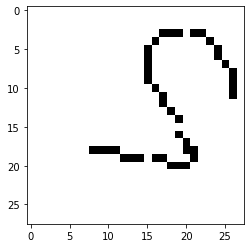

In [40]:
def fill(grid, x, x1, y, y1):
  
  
  
  while len(grid) < 28:
    a = np.array([255 for i in range(19)])
    if x > x1//2:
      grid = np.vstack((a, grid))
    elif x <= x1//2 and x >= 0:
      grid = np.vstack((grid, a))
    x -= 1
  list(grid)
  w = grid.tolist()
  for n in w:
    while len(n) < 28:
      if y > y1//2:
        n.insert(0, 255)
        
   # print(len(n))
    
  grid1 = np.array(w)

  
    
  
  print(grid1.shape)
  return grid1


a = fill(grid, x, x1, y, y1)
for x,y in zip(x_cords,y_cords):
    x,y = int(x),int(y)
    #plt.scatter(x, y)
    
    a[y+min_y-25][x+min_x-20] = 0
plt.imshow(a,cmap='gray', vmin=0, vmax=255)
plt.imsave('test.png', a, cmap='gray', vmin=0, vmax=255)

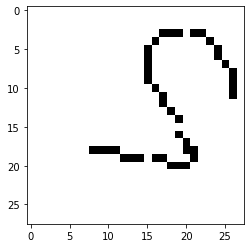

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [41]:
#PREDICTING

fname = 'test.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()


pred = model.predict(a.reshape(1, 28, 28, 1))
print(pred)


